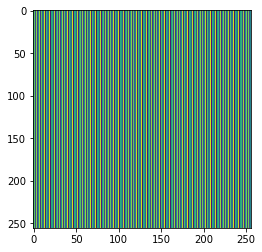

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Generating 2d sine wave image
x = np.arange(0,256)
y = np.sin(2 *np.pi * x/3)

y += max(y) #Offset sine wave by max value to go out of negative range of sine

#Generating a 256 x 256 image 2d array for sine wave
img = np.array([[y[j]*127 for j in range(256)] for i in range(256)],dtype = np.uint8)

plt.figure(1)
plt.imshow(img)
plt.show()

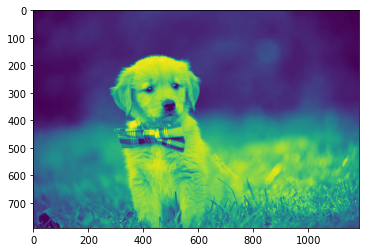

In [2]:
img = cv2.imread('images/testing_image.jpeg',0) #Make sure cv2 can find the image
plt.figure(2)
plt.imshow(img)
plt.show()

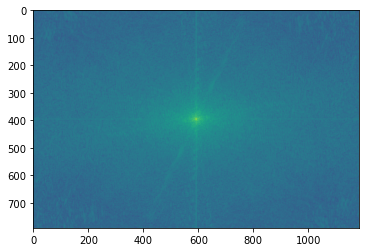

In [3]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

#Shifting the data to the center of the image, otherwise the image would be located at the top left corner
dft_shift = np.fft.fftshift(dft) #Better visualization

#Calculating magnitude spectrum from DFT(The real part and imaginary part)
#Added 1 as we seen 0 value & log of 0 is undertmined
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
plt.figure(3)
plt.imshow(magnitude_spectrum)
plt.show()

In [4]:
#Circular HPF Masking, this can be changed to LPF mask
#I.e. low frequency at the center of FFT spectrum is blocked
rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2)

mask = np.zeros((rows,cols,2),np.uint8)
#Circle radius
r = 80
#Circle center
center = [crow,ccol]
x,y = np.ogrid[:rows,:cols]
#Creating a mask area of a circle
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 >= r*r
mask[mask_area] = 1

<ipython-input-5-e5a58eb52728>:6: RuntimeWarning: divide by zero encountered in log
  f_shift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


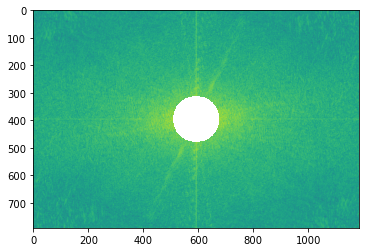

In [5]:
#Apply the mask and inverse DFT with mask value
fshift = dft_shift * mask

#Get the magnitude spectrum(for plotting)
f_shift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

plt.figure(4)
plt.imshow(f_shift_mask_mag)
plt.show()

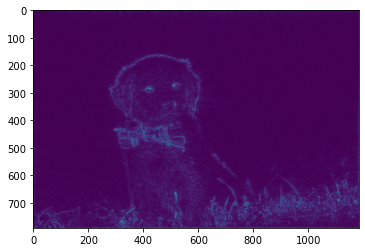

In [6]:
#Inverse shift to shift the origin back to top left
f_ishift = np.fft.ifftshift(fshift)

#Inverse dft to convert back to image doamin from the frequency domain
#These are complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.figure(5)
plt.imshow(img_back)
plt.show()

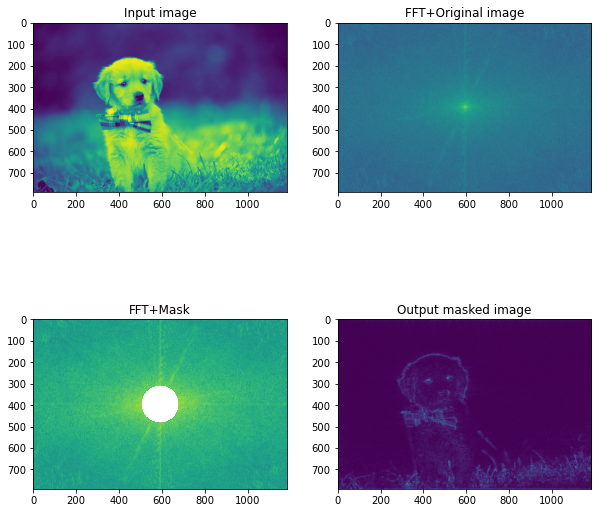

In [7]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
ax1.imshow(img)
ax1.title.set_text('Input image',)

ax2 = fig.add_subplot(222)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text('FFT+Original image',)

ax3 = fig.add_subplot(223)
ax3.imshow(f_shift_mask_mag)
ax3.title.set_text('FFT+Mask',)

ax4 = fig.add_subplot(224)
ax4.imshow(img_back)
ax4.title.set_text('Output masked image')
plt.show()